In [45]:
from rdkit import Chem
from rdkit.Chem import rdFMCS, Descriptors, AllChem

In [2]:
m = Chem.MolFromSmiles('c1ccccc1O')
patt = Chem.MolFromSmarts('ccO')
m.HasSubstructMatch(patt)

True

In [4]:
m = Chem.MolFromSmiles('CCCCC(O)CC')
patt = Chem.MolFromSmarts('CCCCC(I)CCC')
m.HasSubstructMatch(patt)

False

In [42]:
#smiles = ["CCCCC(O)CC", "CCCCC(I)CCC"]
smiles_react = ["OC1=CC=CC=C1", "CCC1=CC=CC=C1"]
smiles_prod = "C(CC1=CC=CC=C1)OC1=CC=CC=C1"
mol_prod = Chem.MolFromSmiles(smiles_prod)
mols_react = [Chem.MolFromSmiles(sm) for sm in smiles_react]
mols = [*mols_react, mol_prod]
res = rdFMCS.FindMCS(mols)
res.smartsString

'[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1'

In [43]:
masses = [Descriptors.ExactMolWt(mol) for mol in mols_react]
print(masses)
sum(masses)

[94.041864812, 106.07825032]


200.120115132

In [44]:
Descriptors.ExactMolWt(mol_prod)

198.104465068

CC


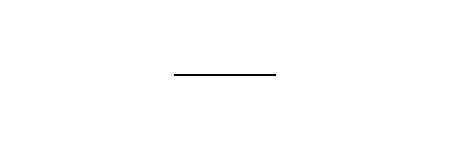

In [51]:
m = mols_react[1]
patt = Chem.MolFromSmarts(res.smartsString)
sub = AllChem.DeleteSubstructs(m,patt)
print(Chem.MolToSmiles(sub))
sub


In [52]:
dir(res)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'canceled',
 'numAtoms',
 'numBonds',
 'queryMol',
 'smartsString']

In [60]:
type(res.queryMol)

rdkit.Chem.rdchem.Mol

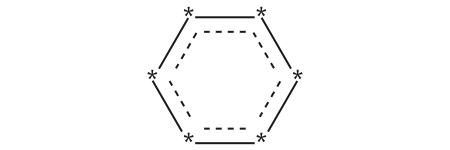

In [61]:
res.queryMol

In [63]:
res.numAtoms

6

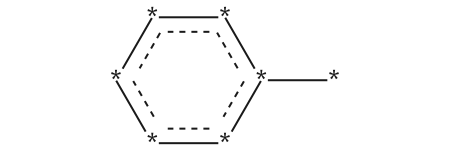

In [74]:
smiles = ["COC1=CC=CC=C1", "OC1=CC=CC=C1"]
mols = [Chem.MolFromSmiles(sm) for sm in smiles]
res = rdFMCS.FindMCS(mols)
res.queryMol

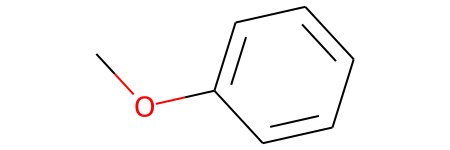

In [75]:
mols[0]

In [70]:
mols[0].GetSubstructMatches(res.queryMol)

((1, 2, 3, 7, 4, 6, 5),)

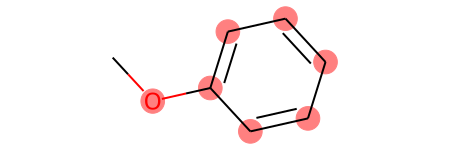

In [72]:
mols[0]

In [71]:
mols[1].GetSubstructMatches(res.queryMol)

((0, 1, 2, 6, 3, 5, 4),)

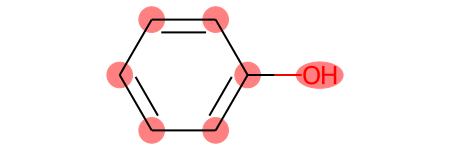

In [73]:
mols[1]

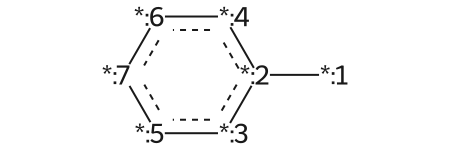

In [98]:
patt = res.queryMol
for atom in patt.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx()+1)
patt

0 1
1 2
2 3
3 7
4 4
5 6
6 5
0 0
1 1
2 2
3 6
4 3
5 5
6 4


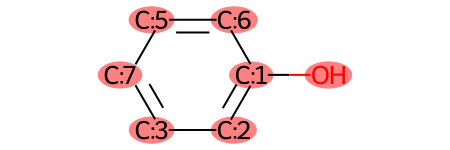

In [109]:
for mol in mols:
    for patt_idx, mol_idx in enumerate(mol.GetSubstructMatch(patt)):
        print(patt_idx, mol_idx)
        patt_atom = patt.GetAtomWithIdx(patt_idx)
        patt_map = patt_atom.GetAtomMapNum()
        #print(patt_map)
        atom = mol.GetAtomWithIdx(idx)
        atom.SetAtomMapNum(patt_map)
mols[1]

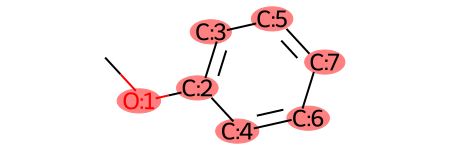

In [120]:
matches = [mol.GetSubstructMatch(patt) for mol in mols]
for map_idx, atoms_idx in enumerate(zip(*matches)):
    for mol, idx in zip(mols, atoms_idx):
        atom = mol.GetAtomWithIdx(idx)
        atom.SetAtomMapNum(map_idx+1)
mols[0]

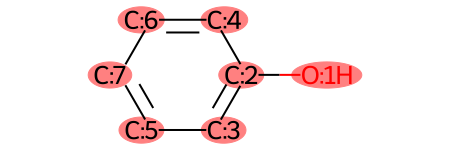

In [121]:
mols[1]

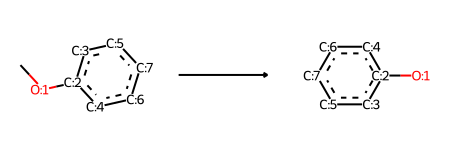

In [124]:
mols_smarts = [Chem.MolToSmarts(mol) for mol in mols]
rxn = AllChem.ReactionFromSmarts('>>'.join(mols_smarts))
rxn